### 1. 필요한 컬럼만 추출

In [7]:
import pandas as pd

`scandal`: ALL스캔들 csv

(column: 소속사, 사건 날짜)

In [8]:
df = pd.read_csv("../코드/전처리/ALL논란_Final+라벨링.csv", parse_dates=['사건 날짜'])
scandal = df[['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용', '라벨 1', '라벨 2', '라벨 3']].copy()
scandal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   소속사     363 non-null    object        
 1   연예인 이름  363 non-null    object        
 2   사건 날짜   363 non-null    datetime64[ns]
 3   그룹      251 non-null    object        
 4   사건 내용   363 non-null    object        
 5   라벨 1    276 non-null    object        
 6   라벨 2    146 non-null    object        
 7   라벨 3    56 non-null     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 22.8+ KB


In [9]:
len(scandal)

363

### 2. 정상 및 비정상 수익률 산출

#### (0) 필요한 함수 정의

> 로그 수익률 계산 함수

In [10]:
import numpy as np

def log_return(df):
    df = df.sort_values('날짜').reset_index(drop=True).copy()
    df['로그 수익률'] = np.log(df['종가'] / df['종가'].shift(1)) # 로그 수익률: log(당일종가/전일종가) 
    return df.dropna().reset_index(drop=True)

> 스캔들-주가 날짜 매핑 함수

스캔들 날짜와 같거나 가장 가까이 있는 주가 날짜로 매핑

In [11]:
def map_closet_date(scandal_date, stock_date):
    return stock_date[stock_date>=scandal_date].min()


#### (1) 소속사/코스닥 주가에 로그 수익률 열 추가

코드 실행 시 생략

In [27]:
import pandas as pd
import numpy as np
import os

firms = scandal['소속사'].unique()

for firm in firms:
    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])
    stock = log_return(stock)
    stock.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f'{firm} 로그 수익률 열 추가')

HYBE 로그 수익률 열 추가
JYP 로그 수익률 열 추가
RBW 로그 수익률 열 추가
SM 로그 수익률 열 추가
SM C&C 로그 수익률 열 추가
YG 로그 수익률 열 추가
아티스트컴퍼니 로그 수익률 열 추가
큐브 로그 수익률 열 추가
키이스트 로그 수익률 열 추가


In [107]:
file_path = "C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/코스닥.csv"
stock = pd.read_csv(file_path, parse_dates=['날짜'])
stock = log_return(stock)
stock.to_csv(file_path, index=False, encoding='utf-8-sig')
print('로그 수익률 열 추가')

로그 수익률 열 추가


#### (2) 시장 지수 선택

`market`: 시장 지수 csv

In [12]:
market = pd.read_csv("C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/코스닥.csv", parse_dates=['날짜'])

#### (3) 스캔들 날짜를 각각의 소속사 주가 날짜로 매핑

`매핑된 주가 날짜` 열을 `scandal`에 추가

In [13]:
import pandas as pd
import numpy as np
import os

mapped_dates =[]

for idx, row in scandal.iterrows():
    firm = row['소속사']
    scandal_date = row['사건 날짜']
    text = row['사건 내용']
    group = row['그룹']
    label1= row['라벨 1']
    label2= row['라벨 2']
    label3=row['라벨 3']

    # 소속사 주가 파일 경로
    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"

    stock = pd.read_csv(file_path, parse_dates=['날짜'])
    stock_dates = stock['날짜']
    mapped_date = map_closet_date(scandal_date, stock_dates)
    mapped_dates.append(mapped_date)

scandal['매핑된 주가 날짜'] = mapped_dates

scandal[['소속사', '사건 날짜', '매핑된 주가 날짜', '사건 내용', '그룹',  '라벨 1', '라벨 2', '라벨 3']]

,소속사,사건 날짜,매핑된 주가 날짜,사건 내용,그룹,라벨 1,라벨 2,라벨 3
0,HYBE,2022-04-25,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,세금 문제,팬 대응,NaN
1,HYBE,2024-01-06,2024-01-08,"2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ...",방탄소년단,범죄 혐의,기타,NaN
2,HYBE,2021-11-18,2021-11-18,"2021년 11월 18일 오후 5시 , ENHYPEN 은 D-1 이라는 제목으로 V...",엔하이픈,발언 문제,무의식적 태도,NaN
3,HYBE,2021-11-19,2021-11-19,2021년 11월 19일 사과문을 게시했다. [ 펼치기 · 접기 ] 엔진 여러분 안...,엔하이픈,발언 문제,무의식적 태도,NaN
4,HYBE,2023-01-10,2023-01-10,"2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ...",엔하이픈,발언 문제,사회적 감수성,무의식적 태도
...,...,...,...,...,...,...,...,...
358,키이스트,2024-05-07,2024-05-07,2024년 5월 7일 구하라법이 국회 법제사법위원회 법안심사소위원회를 통과했다.(의...,NaN,NaN,NaN,NaN
359,키이스트,2024-08-28,2024-08-28,"2024년 8월 28일, 만 5년의 세월과 두 차례의 폐기 끝에 마침내 제22대 국...",NaN,NaN,NaN,NaN
360,키이스트,2024-04-25,2024-04-25,2024년 4월 25일 이후 상속이 개시된 경우에도 소급 적용될 수 있도록 했다. ...,NaN,NaN,NaN,NaN
361,키이스트,2024-07-16,2024-07-16,2024년 7월 16일 에 I Do I Do 의 선공개 곡인 Hello 가 발표되었...,NaN,NaN,NaN,NaN


In [14]:
abs(scandal['사건 날짜'] - scandal['매핑된 주가 날짜']).unique()

<TimedeltaArray>
['0 days', '2 days', '1 days', '3 days']
Length: 4, dtype: timedelta64[ns]

In [15]:
scandal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   소속사        363 non-null    object        
 1   연예인 이름     363 non-null    object        
 2   사건 날짜      363 non-null    datetime64[ns]
 3   그룹         251 non-null    object        
 4   사건 내용      363 non-null    object        
 5   라벨 1       276 non-null    object        
 6   라벨 2       146 non-null    object        
 7   라벨 3       56 non-null     object        
 8   매핑된 주가 날짜  363 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 25.7+ KB


#### (3) 각 사건에 대해 소속사 주가 데이터에서 행 번호 추출

In [16]:
stock_rows = []

for idx, row in scandal.iterrows():
    firm = row['소속사']
    mapped_date = row['매핑된 주가 날짜']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])

    row_index = stock[stock['날짜'].dt.date == mapped_date.date()].index[0]

    stock_rows.append(row_index)

scandal['주가 행 인덱스']=stock_rows
scandal[['소속사', '연예인 이름', '사건 날짜', '매핑된 주가 날짜','주가 행 인덱스', '그룹', '사건 내용']]

,소속사,연예인 이름,사건 날짜,매핑된 주가 날짜,주가 행 인덱스,그룹,사건 내용
0,HYBE,지민,2022-04-25,2022-04-25,375,방탄소년단,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있..."
1,HYBE,정국,2024-01-06,2024-01-08,795,방탄소년단,"2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ..."
2,HYBE,정원,2021-11-18,2021-11-18,269,엔하이픈,"2021년 11월 18일 오후 5시 , ENHYPEN 은 D-1 이라는 제목으로 V..."
3,HYBE,정원,2021-11-19,2021-11-19,270,엔하이픈,2021년 11월 19일 사과문을 게시했다. [ 펼치기 · 접기 ] 엔진 여러분 안...
4,HYBE,제이,2023-01-10,2023-01-10,552,엔하이픈,"2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ..."
...,...,...,...,...,...,...,...
358,키이스트,구하라,2024-05-07,2024-05-07,2493,NaN,2024년 5월 7일 구하라법이 국회 법제사법위원회 법안심사소위원회를 통과했다.(의...
359,키이스트,구하라,2024-08-28,2024-08-28,2571,NaN,"2024년 8월 28일, 만 5년의 세월과 두 차례의 폐기 끝에 마침내 제22대 국..."
360,키이스트,구하라,2024-04-25,2024-04-25,2487,NaN,2024년 4월 25일 이후 상속이 개시된 경우에도 소급 적용될 수 있도록 했다. ...
361,키이스트,구하라,2024-07-16,2024-07-16,2541,NaN,2024년 7월 16일 에 I Do I Do 의 선공개 곡인 Hello 가 발표되었...


In [17]:
sum(scandal['주가 행 인덱스'].isna())

0

#### (4) 비정상수익률 계산

- 이벤트 윈도우: -3 ~ +3

- 추정 윈도우: -90 ~ -4

> 윈도우 합집합인 -90 ~ +3 개 있는 스캔들만 필터링

목적: 시장모형추정 윈도우와 이벤트 윈도우 일치 행 필터링

In [18]:
윈도우_통과 = []

for i in range(len(scandal)):
    firm = scandal.loc[i, '소속사']
    stock_row = scandal.loc[i, '주가 행 인덱스']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])

    est_start = stock_row - 90
    event_end = stock_row + 3

    if est_start >= 0 and event_end < len(stock):
        윈도우_통과.append(True)
    else:
        윈도우_통과.append(False)

scandal['윈도우 통과'] = 윈도우_통과
print("윈도우 통과 사건 수:", scandal['윈도우 통과'].sum(), "/", len(scandal))

윈도우 통과 사건 수: 356 / 363


In [20]:
scandal_final = scandal[(scandal['윈도우 통과'])].reset_index(drop=True)
len(scandal_final)

356

In [21]:
scandal_final.columns

Index(['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용', '라벨 1', '라벨 2', '라벨 3',
       '매핑된 주가 날짜', '주가 행 인덱스', '윈도우 통과'],
      dtype='object')

> 각 사건의 주가 윈도우의 날짜가 벤치마크의 날짜 리스트에 있는 행만 필터링

목적: 기대 수익률 계산시 주가 날짜와 같은 날짜의 벤치마크 데이터 사용 가능 행 필터링

In [22]:
market_dates = set(market['날짜']) 

행_완전한_사건 = []

for i in range(len(scandal_final)):
    firm = scandal_final.loc[i, '소속사']
    stock_row = scandal_final.loc[i, '주가 행 인덱스']

    file_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(file_path, parse_dates=['날짜'])
    # 위로 3개, 아래로 5개
    event_window = stock.iloc[stock_row - 3 : stock_row + 4].copy()

    if all(date in market_dates for date in event_window['날짜']):
        행_완전한_사건.append(i)

scandal_final = scandal_final.loc[행_완전한_사건].reset_index(drop=True)
len(scandal_final)

345

> 비정상 수익률 계산

`기대 수익률`: 사건이 없었다면 정상적으로 기대되는 수익률

In [23]:
from sklearn.linear_model import LinearRegression
import pandas as pd

result = []

for i in range(len(scandal_final)):
    firm = scandal_final.loc[i, '소속사']
    mapped_date = scandal_final.loc[i, '매핑된 주가 날짜']
    stock_row = scandal_final.loc[i, '주가 행 인덱스']
    scandal_date = scandal_final.loc[i, '사건 날짜']
    celeb_name = scandal_final.loc[i, '연예인 이름']
    text_all = scandal_final.loc[i, '사건 내용']
    group_all = scandal_final.loc[i, '그룹']
    label1= scandal_final.loc[i, '라벨 1']
    label2= scandal_final.loc[i, '라벨 2']
    label3=scandal_final.loc[i, '라벨 3']

    stock_path = f"C:/Users/chica/OneDrive/바탕 화면/BAF-25-1-finance_2/데이터/주가/{firm}.csv"
    stock = pd.read_csv(stock_path, parse_dates=['날짜'])
    market_window = market[['날짜', '로그 수익률']].rename(columns={'로그 수익률': '시장 수익률'})

    # 추정기간, 시장모형 회귀
    # 위로 90행, 위로 4행
    est_window = stock.iloc[stock_row - 90 : stock_row - 3].copy()
    est_window = pd.merge(est_window, market_window, on='날짜', how='left')
    est_window = est_window.dropna()

    X = est_window[['시장 수익률']]
    y = est_window['로그 수익률']
    model = LinearRegression().fit(X, y)
    alpha = model.intercept_
    beta = model.coef_[0]

    # 사건기간, 비정상 수익률 계산
    # 위로 3행, 아래로 5행
    event_window = stock.iloc[stock_row - 3 : stock_row + 4].copy()
    event_window = pd.merge(event_window, market_window, on='날짜', how='left')
    event_window = event_window.dropna()

    event_window['기대 수익률'] = alpha + beta * event_window['시장 수익률']
    event_window['비정상 수익률'] = event_window['로그 수익률'] - event_window['기대 수익률']
    event_window['실제 range(이 행의 주가 날짜와 사건일간 차이)'] = (event_window['날짜'] - mapped_date).dt.days # 이 행이 사건일로부터 날짜 기준으로 며칠 떨어졌는지
    event_window['range(행 개수 기준)'] = list(range(-3,4)) # 이 행이 사건일로부터 몇 행 떨어졌는지
    event_window['차이'] = abs(event_window['range(행 개수 기준)']-event_window['실제 range(이 행의 주가 날짜와 사건일간 차이)']) # 위에 둘 사이의 불일치 정도(절댓값) 를 나타내는 지표
    event_window['소속사'] = firm
    event_window['연예인 이름'] = celeb_name
    event_window['사건 날짜'] = scandal_date
    event_window['사건 내용'] = text_all
    event_window['그룹'] = group_all
    event_window['사건 날짜(매핑된 주가 날짜)'] = mapped_date
    event_window['라벨 1'] = label1
    event_window['라벨 2'] = label2
    event_window['라벨 3'] = label3
    
    result.append(event_window)

abnormal = pd.concat(result, ignore_index=True)
abnormal

,날짜,종가,시가,고가,저가,거래량,변동 %,로그 수익률,거래량 변화율,시장 수익률,...,차이,소속사,연예인 이름,사건 날짜,사건 내용,그룹,사건 날짜(매핑된 주가 날짜),라벨 1,라벨 2,라벨 3
0,2022-04-20,264000,281500,281500,263500,46509000.0,-5.71,-0.058841,2.864158,-0.003228,...,2,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,2022-04-25,세금 문제,팬 대응,NaN
1,2022-04-21,261000,263000,267000,257500,23326000.0,-1.14,-0.011429,-0.498463,0.001077,...,2,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,2022-04-25,세금 문제,팬 대응,NaN
2,2022-04-22,254500,260000,260000,253500,21876000.0,-2.49,-0.025220,-0.062162,-0.007564,...,2,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,2022-04-25,세금 문제,팬 대응,NaN
3,2022-04-25,250500,248500,257000,246500,16526000.0,-1.57,-0.015842,-0.244560,-0.025262,...,0,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,2022-04-25,세금 문제,팬 대응,NaN
4,2022-04-26,260500,253000,264000,253000,25146000.0,3.99,0.039144,0.521602,0.013260,...,0,HYBE,지민,2022-04-25,"2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...",방탄소년단,2022-04-25,세금 문제,팬 대응,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2024-04-24,5780,5800,5850,5770,2278000.0,-0.17,-0.001729,-0.345402,0.019919,...,0,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN,2024-04-25,NaN,NaN,NaN
2411,2024-04-25,5650,5750,5820,5650,4598000.0,-2.25,-0.022748,1.018437,-0.010496,...,0,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN,2024-04-25,NaN,NaN,NaN
2412,2024-04-26,5740,5690,5740,5670,1296000.0,1.59,0.015804,-0.718138,0.003511,...,0,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN,2024-04-25,NaN,NaN,NaN
2413,2024-04-29,5780,5740,5820,5710,1793000.0,0.70,0.006944,0.383488,0.015073,...,2,키이스트,구하라,2024-04-25,"2024년 4월 25일 위헌법률심판에 따른 위헌결정으로 효력이 ""결정이 있는 날""부...",NaN,2024-04-25,NaN,NaN,NaN


In [24]:
abnormal.columns

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '변동 %', '로그 수익률', '거래량 변화율',
       '시장 수익률', '기대 수익률', '비정상 수익률', '실제 range(이 행의 주가 날짜와 사건일간 차이)',
       'range(행 개수 기준)', '차이', '소속사', '연예인 이름', '사건 날짜', '사건 내용', '그룹',
       '사건 날짜(매핑된 주가 날짜)', '라벨 1', '라벨 2', '라벨 3'],
      dtype='object')

In [25]:
for val in sorted(abnormal['차이'].unique()):
    subset = abnormal[abnormal['차이'] == val]
    count = len(subset)
    unique_ranges = subset['range(행 개수 기준)'].unique()
    print(f"차이 = {val} : 행 개수: {count}, range(행 개수 기준)열의 유니크 값: {unique_ranges}")

차이 = 0 : 행 개수: 1425, range(행 개수 기준)열의 유니크 값: [ 0  1  2  3 -3 -2 -1]
차이 = 1 : 행 개수: 49, range(행 개수 기준)열의 유니크 값: [-2 -1 -3  2  3  1]
차이 = 2 : 행 개수: 745, range(행 개수 기준)열의 유니크 값: [-3 -2 -1  2  3  1]
차이 = 3 : 행 개수: 107, range(행 개수 기준)열의 유니크 값: [ 1  2  3 -3 -2 -1]
차이 = 4 : 행 개수: 56, range(행 개수 기준)열의 유니크 값: [-3 -2 -1  2  3  1]
차이 = 5 : 행 개수: 17, range(행 개수 기준)열의 유니크 값: [-3 -2 -1  2  3  1]
차이 = 6 : 행 개수: 8, range(행 개수 기준)열의 유니크 값: [ 2  3 -3 -2 -1]
차이 = 7 : 행 개수: 5, range(행 개수 기준)열의 유니크 값: [-3  3]
차이 = 20 : 행 개수: 3, range(행 개수 기준)열의 유니크 값: [-3 -2 -1]


In [26]:
len(abnormal)/7 # 0일 포함 7행씩 있는지

345.0

#### (5) AAR, CAAR 계산

- `AAR` (Average Abnormal Return): event_window_day별 비정상 수익률의 평균

- `CAAR` (Cumulative AAR):	AAR의 누적합


In [27]:
import numpy as np

# AAR
aar_df = abnormal.groupby('range(행 개수 기준)')['비정상 수익률'].agg(['mean', 'std', 'count']).reset_index()
aar_df = aar_df.rename(columns={'mean': 'AAR', 'std': 'STD', 'count': 'N'})

# CAAR
aar_df['CAAR'] = aar_df['AAR'].cumsum()

In [28]:
abnormal.columns

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '변동 %', '로그 수익률', '거래량 변화율',
       '시장 수익률', '기대 수익률', '비정상 수익률', '실제 range(이 행의 주가 날짜와 사건일간 차이)',
       'range(행 개수 기준)', '차이', '소속사', '연예인 이름', '사건 날짜', '사건 내용', '그룹',
       '사건 날짜(매핑된 주가 날짜)', '라벨 1', '라벨 2', '라벨 3'],
      dtype='object')

#### (6) t검정 진행

> 각 AAR 값이 0과 통계적으로 다른지 검정

`차이` 가 0 또는 1인 데이터만 사용

In [29]:
abnormal_10_10 = abnormal[abnormal['차이'].between(0, 1)].copy()

In [30]:
len(abnormal)

2415

In [31]:
len(abnormal_10_10)

1474

In [32]:
# 결과적으로 필터링 이후 각 range에 남은 행 개수

for i in range(-3,4):
    print(i,"번째 날", len(abnormal_10_10[abnormal_10_10['range(행 개수 기준)']==i]))


-3 번째 날 90
-2 번째 날 151
-1 번째 날 204
0 번째 날 345
1 번째 날 286
2 번째 날 230
3 번째 날 168


> 전체 표본의 평균 비정상 수익률(AAR)의 결과 값

| 열 이름                                      | 의미                            |
| ----------------------------------------- | ----------------------------- |
| **Event day**                             | 사건일 기준 상대 날짜 (AR(t))          |
| **Average Abnormal Return(%)**            | 해당일의 AAR (평균 비정상 수익률), 퍼센트 단위 |
| **T-Statistic**                           | AAR의 t-검정 통계량                 |
| **P-value**                               | t-검정의 유의확률 (AAR이 0과 유의하게 다른지) |
| **Cumulative Average Abnormal Return(%)** | 해당일까지 누적 AAR (CAAR), 퍼센트 단위   |
| **% of -Abnormal Returns**                | 해당일의 비정상 수익률이 **음수인 사건 비율**   |


In [36]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

summary_rows = []

for day in range(-3, 6):
    day_df = abnormal_10_10[abnormal_10_10['range(행 개수 기준)'] == day]
    ar_values = day_df['비정상 수익률']

    if len(ar_values) == 0:
        continue

    aar = ar_values.mean()
    std = ar_values.std(ddof=1)
    n = len(ar_values)

    # t검정
    t_stat, p_val = ttest_1samp(ar_values, 0)

    # 음의 수익률 비율
    neg_ratio = (ar_values < 0).mean() * 100

    summary_rows.append({
        'Event day': f"AR({day})",
        'Average Abnormal Return(%)': round(aar * 100, 2),
        'T-Statistic': round(t_stat, 5),
        'P-value': round(p_val, 3),
        'Significant at 5%': p_val < 0.05,
        'Significant at 1%': p_val < 0.01,
        '% of -Abnormal Returns': round(neg_ratio, 2)
    })

# DataFrame 생성
summary_df = pd.DataFrame(summary_rows)

# CAAR 누적합 추가
summary_df['Cumulative Average Abnormal Return(%)'] = summary_df['Average Abnormal Return(%)'].cumsum()

# 열 순서 정리
summary_df = summary_df[[
    'Event day', 'Average Abnormal Return(%)', 'T-Statistic', 'P-value',
    'Significant at 5%', 'Significant at 1%',
    'Cumulative Average Abnormal Return(%)', 
    '% of -Abnormal Returns' # 수익률이 음수인 비율
]]

# 결과 확인
summary_df

,Event day,Average Abnormal Return(%),T-Statistic,P-value,Significant at 5%,Significant at 1%,Cumulative Average Abnormal Return(%),% of -Abnormal Returns
0,AR(-3),8.51,2.51745,0.014,True,False,8.51,43.33
1,AR(-2),0.96,0.49443,0.622,False,False,9.47,54.30
2,AR(-1),-0.04,-0.03075,0.976,False,False,9.43,55.39
3,AR(0),-1.35,-1.86057,0.064,False,False,8.08,56.23
4,AR(1),-2.58,-4.12106,0.000,True,True,5.50,62.59
5,AR(2),-2.42,-4.00733,0.000,True,True,3.08,56.96
6,AR(3),-1.94,-2.95249,0.004,True,True,1.14,61.31


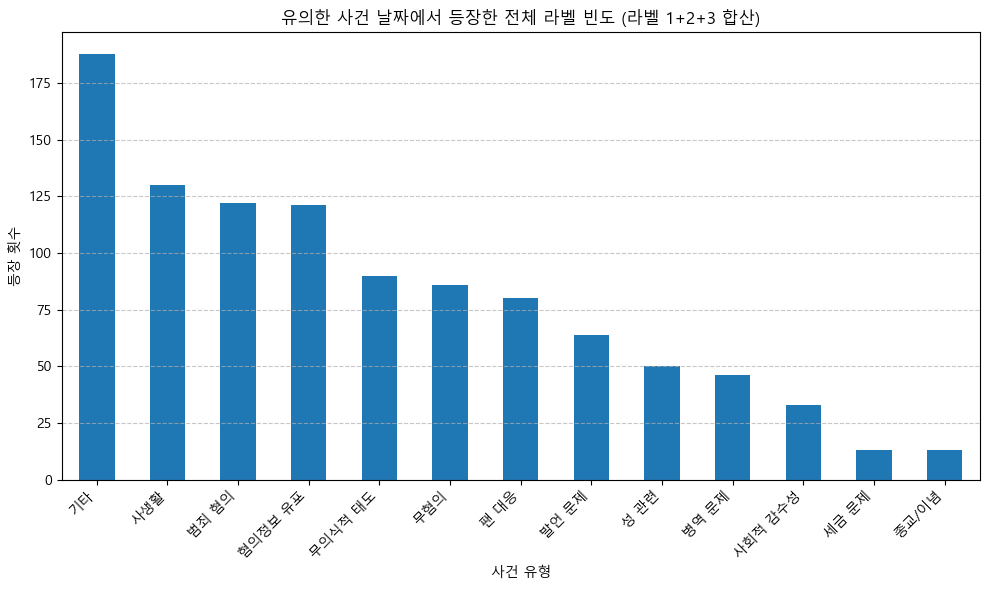

In [40]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정 (OS에 따라 다르게)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows: 맑은 고딕
    
# 1. 유의한 날짜 구하기
significant_days = summary_df[summary_df['P-value'] < 0.05]['Event day']
significant_days = significant_days.str.extract(r'AR\((-?\d+)\)')[0].astype(int).tolist()

# 2. 해당 날짜 데이터 필터링
sig_df = abnormal_10_10[abnormal_10_10['range(행 개수 기준)'].isin(significant_days)]

# 3. 라벨 1~3을 하나로 합치기
label_cols = ['라벨 1', '라벨 2', '라벨 3']
all_labels = pd.concat([sig_df[col] for col in label_cols], ignore_index=True)

# 4. 결측 제거하고 빈도 집계
label_counts = all_labels.dropna().value_counts()

# 5. barplot 시각화
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('유의한 사건 날짜에서 등장한 전체 라벨 빈도 (라벨 1+2+3 합산)')
plt.xlabel('사건 유형')
plt.ylabel('등장 횟수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시: summary_dfCAR에 '사건 유형'이라는 컬럼이 있다고 가정
event_type_column = ['라벨 1', '라벨 2', '라벨 3']  # <- 실제 컬럼명으로 바꿔주세요

# 유의한 사건 필터링 (5% 수준)
significant_events = df[df['P-value'] < 0.05]

# 사건 유형별 개수 집계
event_counts = significant_events[event_type_column].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title('유의한 사건들의 사건 유형별 개수 (p < 0.05)')
plt.xlabel('사건 유형')
plt.ylabel('건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> 구간별 CAAR t검정

| 항목                | 설명                                  |
| ----------------- | ----------------------------------- |
| **구간 (interval)** | `range(실제 행 기준)` 열 기준 |
| **CAARs(%)**      | 해당 구간에서 사건별 CAR 평균 (누적 비정상 수익률의 평균) |
| **T-statistic**   | 사건별 CAR 리스트에 대한 단일표본 t검정 결과         |
| **P-value**       | 해당 t값의 유의확률 (two-sided)             |


In [293]:
from scipy.stats import ttest_1samp
intervals = [
            (-1, 0), 
            (-1,+1),
            (0,+1),
            (+1,+2),
            (+1,+3),
            ]

In [294]:
caar_results = []

for start, end in intervals:
    interval_df = abnormal_10_10[abnormal_10_10['range(행 개수 기준)'].between(start, end)]

    car_by_event = (
        interval_df.groupby(['소속사', '연예인 이름', '사건 날짜'])['비정상 수익률']
        .sum()
        .reset_index()
        .rename(columns={'비정상 수익률': 'CAR'})
    )

    car_values = car_by_event['CAR'].values

    # CAAR 및 t-검정
    caar = car_values.mean()
    std = car_values.std(ddof=1)
    n = len(car_values)
    t_stat, p_val = ttest_1samp(car_values, 0)

    caar_results.append({
        '구간': f"[{start}, {end}]",
        'CAAR': caar,
        '표준편차': std,
        'N': n,
        't값': t_stat,
        'p값': p_val,
        '유의(5%)': abs(t_stat) > 1.96,
        '유의(1%)': abs(t_stat) > 2.58
    })

# 결과 DataFrame
caar_df = pd.DataFrame(caar_results)

In [295]:
caar_df

,구간,CAAR,표준편차,N,t값,p값,유의(5%),유의(1%)
0,"[-1, 0]",-0.014720,0.200623,322,-1.316628,0.188903,False,False
1,"[-1, 1]",-0.037598,0.245078,322,-2.752883,0.006243,True,True
2,"[0, 1]",-0.037339,0.210148,322,-3.188354,0.001572,True,True
3,"[1, 2]",-0.049172,0.205883,263,-3.873216,0.000136,True,True
4,"[1, 3]",-0.061573,0.264275,263,-3.778453,0.000195,True,True


### 3. 데이터 정리

In [308]:
# AR1, AR2 추출
ar1_df = abnormal_10_10[abnormal_10_10['range(행 개수 기준)'] == 1][
    ['소속사', '연예인 이름', '사건 날짜', '비정상 수익률']
].rename(columns={'비정상 수익률': 'AR1'})

ar2_df = abnormal_10_10[abnormal_10_10['range(행 개수 기준)'] == 2][
    ['소속사', '연예인 이름', '사건 날짜', '비정상 수익률']
].rename(columns={'비정상 수익률': 'AR2'})

# AR1, AR2 병합
merged = pd.merge(ar1_df, ar2_df, on=['소속사', '연예인 이름', '사건 날짜'], how='inner')

# 메타 정보 준비 (매핑된 날짜 포함)
meta_info = abnormal_10_10[
    ['소속사', '연예인 이름', '사건 날짜', '그룹', '사건 내용', '라벨 1', '라벨 2', '라벨 3', '사건 날짜(매핑된 주가 날짜)']
].drop_duplicates()

# 메타 정보 병합
merged = pd.merge(merged, meta_info, on=['소속사', '연예인 이름', '사건 날짜'], how='left')

# CAR 계산
merged['CAR(1,2)'] = merged['AR1'] + merged['AR2']

# 결과 확인
print(merged.head())

    소속사 연예인 이름      사건 날짜       AR1       AR2     그룹  \
0  HYBE     지민 2022-04-25  0.027321  0.018462  방탄소년단   
1  HYBE     정국 2024-01-06 -0.017447  0.018590  방탄소년단   
2  HYBE     제이 2023-01-10 -0.001733 -0.012679   엔하이픈   
3  HYBE    김채원 2023-09-05 -0.003702 -0.011398   르세라핌   
4  HYBE    김채원 2022-10-19 -0.025109  0.010665   르세라핌   

                                               사건 내용   라벨 1     라벨 2     라벨 3  \
0  2022년 4월 25일, 언론사 비즈한국의 취재결과 건강보험료 체납으로 보유하고 있...  세금 문제     팬 대응      NaN   
1  2024년 1월 6일, 정국이 입대 후 신병 교육을 받는 동안 발생했다. 탈취범은 ...  범죄 혐의       기타      NaN   
2  2023년 1월 10일, 멤버 성훈과 함께 진행한 위버스 라이브 도중 요즘 한국사 ...  발언 문제  사회적 감수성  무의식적 태도   
3  2023년 9월 5일 방송통신심의위원회 방송소위원회에서 “경찰에서 무혐의 결론이 났...    무혐의      NaN      NaN   
4  2022년 10월 19일 김채원 과 허윤진 이 차량 이동 중 접촉 사고 를 당했다....     기타      NaN      NaN   

  사건 날짜(매핑된 주가 날짜)  CAR(1,2)  
0       2022-04-25  0.045783  
1       2024-01-08  0.001144  
2       2023-01-10 -0.014412  
3       2023-09-05 -0.015100  
4       2022-10-19 -0

In [309]:
merged.columns

Index(['소속사', '연예인 이름', '사건 날짜', 'AR1', 'AR2', '그룹', '사건 내용', '라벨 1', '라벨 2',
       '라벨 3', '사건 날짜(매핑된 주가 날짜)', 'CAR(1,2)'],
      dtype='object')

In [310]:
len(merged)

326

In [311]:
merged.to_csv("AR_CAR+라벨.csv", index=False, encoding='utf-8-sig')